In [226]:
# Base libraries
import os
from os.path import isfile, join
import numpy as np
import pandas as pd
from umap import UMAP
import seaborn as sns
import matplotlib.pyplot as plt
# NetworkX
import networkx as nx
import osmnx as ox
# OS environment setup
from local_directories import *

In [227]:
# Reset random seeds
random_seed = 2674
# Other
neighbourhood_min_nodes = 8
max_distance = 1000

In [228]:
# Load Leciester's graph
leicester_osmnx_graph = ox.io.load_graphml(bulk_storage_directory + "/osmnx/raw_excluded/leicester-1864.graphml")
leicester_osmnx_graph_prj = ox.project_graph(leicester_osmnx_graph)

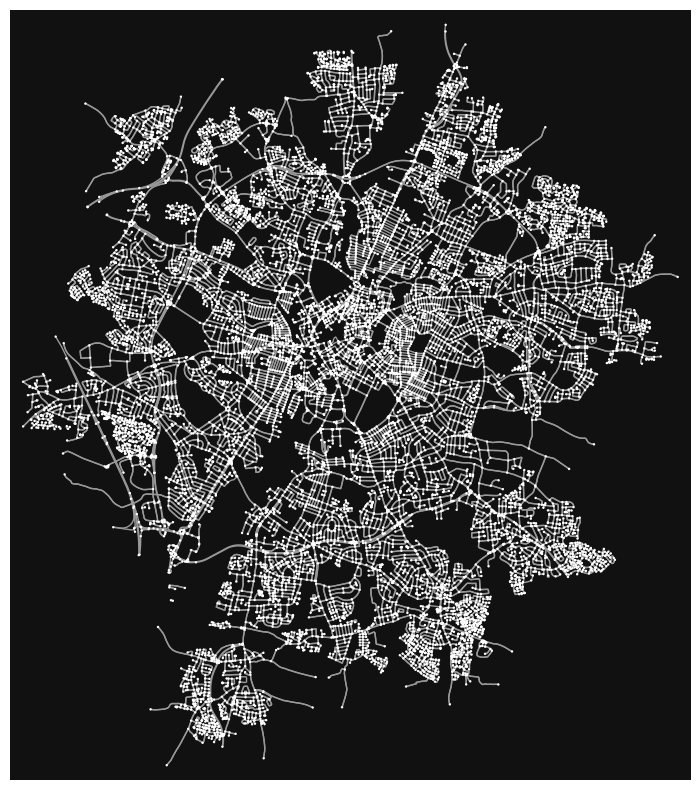

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [229]:
ox.plot_graph(leicester_osmnx_graph_prj, node_size=3, figsize=(10, 10))

In [230]:
# Load Leciester's base stats
leicester_osmnx_basic_stats = pd.read_csv(this_repo_directory + "/data/leicester-1864_basic_stats.csv")

In [231]:
# Load Leciester's embeddings
leicester_emb_df = pd.read_csv(this_repo_directory + "/data/leicester-1864_emb_gnnuf_model_v0-1.csv")

# UMAP

UMAP is applied on the 64 embeddings for dimensionality reduction. Two dimensions are extracted using high `n_neighbors` value (10% of the size of the dataset) to emphasise the global structure of the data over the local.

/opt/anaconda3/envs/gnn-urban-form/lib/python3.10/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


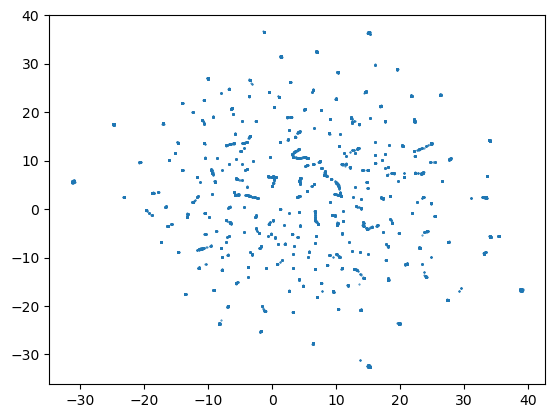

In [232]:
leicester_emb_umap = UMAP(n_neighbors=1320, random_state=random_seed).fit_transform(leicester_emb_df)
plt.scatter(leicester_emb_umap[:,0], leicester_emb_umap[:,1], s=0.2)
plt.show()

In [233]:
# Add to the rest of the dataset
leicester_emb_df["UMAP0"] = leicester_emb_umap[:,0]
leicester_emb_df["UMAP1"] = leicester_emb_umap[:,1]
leicester_emb_df

osmnx_node_id    EMB000    EMB001    EMB002    EMB003    EMB004   
0             194739  0.058132 -0.458860 -0.145767 -0.285091 -0.085929  \
1             326313  0.094816  0.557495 -0.093045 -0.011884 -0.061040   
2             326320 -0.019111 -0.328789 -0.037510 -0.301092 -0.016108   
3             326321 -0.001485 -0.147044 -0.044975 -0.244422 -0.032524   
4             337952  0.100466 -0.474911 -0.056165 -0.197441 -0.084268   
...              ...       ...       ...       ...       ...       ...   
13197     8270436113  0.043736  0.151622 -0.069116 -0.003122 -0.029713   
13198     8270436114  0.049631  0.081628 -0.077026  0.018906 -0.036652   
13199     8270436115  0.049631  0.081628 -0.077026  0.018906 -0.036652   
13200     8270480133  0.041278  0.092587 -0.079942  0.017196 -0.038339   
13201     8270480134  0.045240  0.100428 -0.077111  0.027284 -0.036669   

         EMB005    EMB006    EMB007    EMB008  ...    EMB056    EMB057   
0      0.001039 -0.114919 -0.317918  0.087763  ...  0.020925  0.278471  \
1      0.041797 -0.083144 -0.092589 -0.044544  ...  0.147945  0.101059   
2     -0.065660  0.015503 -0.217649  0.075145  ... -0.108614  0.182103   
3     -0.036243 -0.009918 -0.193455  0.052327  ... -0.075764  0.162420   
4      0.026210  0.026388 -0.242142  0.119400  ... -0.055238  0.197664   
...         ...       ...       ...       ...  ...       ...       ...   
13197  0.006834  0.024938  0.011507 -0.058206  ... -0.070650 -0.009959   
13198  0.011132  0.023665 -0.013654 -0.053505  ... -0.085438 -0.014469   
13199  0.011132  0.023665 -0.013654 -0.053505  ... -0.085438 -0.014469   
13200  0.011681  0.023435 -0.008550 -0.063027  ... -0.082135 -0.012360   
13201  0.015141  0.023836 -0.008544 -0.062323  ... -0.085039 -0.016018   

         EMB058    EMB059    EMB060    EMB061    EMB062    EMB063     UMAP0   
0      0.245699 -0.040401  0.241939  0.748186  0.248376  0.190477 -6.892240  \
1      0.127721 -0.063711 -0.025532  0.704117 -0.009269 -0.058999 -6.891864   
2      0.120711  0.087842  0.230086  0.515353  0.173155  0.022252 -6.929446   
3      0.105585  0.051283  0.174939  0.568172  0.134996 -0.002550 -6.894612   
4      0.190462 -0.007274  0.164714  0.713259  0.168593  0.160875 -6.893536   
...         ...       ...       ...       ...       ...       ...       ...   
13197  0.030411 -0.049779  0.018605 -0.119456 -0.003080  0.083766 -5.940827   
13198  0.024854 -0.036601 -0.001525 -0.048934 -0.028631  0.050902 -5.942855   
13199  0.024854 -0.036601 -0.001525 -0.048934 -0.028631  0.050902 -5.940349   
13200  0.016865 -0.040721 -0.005624 -0.082236 -0.025790  0.049762 -5.944045   
13201  0.018982 -0.037076 -0.007915 -0.078186 -0.027823  0.042378 -5.941204   

          UMAP1  
0      0.282063  
1      0.282041  
2      0.242654  
3      0.279886  
4      0.280278  
...         ...  
13197  3.496524  
13198  3.499273  
13199  3.496944  
13200  3.500050  
13201  3.497638  

[13202 rows x 67 columns]

Plotting the UMAP0 and UMAP1 values on the map

In [234]:
for node in leicester_osmnx_graph_prj.nodes:
    if len(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP0"].values) == 0:
        leicester_osmnx_graph_prj.nodes[node]["UMAP0"] = None
        leicester_osmnx_graph_prj.nodes[node]["UMAP1"] = None
    else:
        leicester_osmnx_graph_prj.nodes[node]["UMAP0"] = float(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP0"].values)
        leicester_osmnx_graph_prj.nodes[node]["UMAP1"] = float(leicester_emb_df[leicester_emb_df["osmnx_node_id"] == node]["UMAP1"].values)

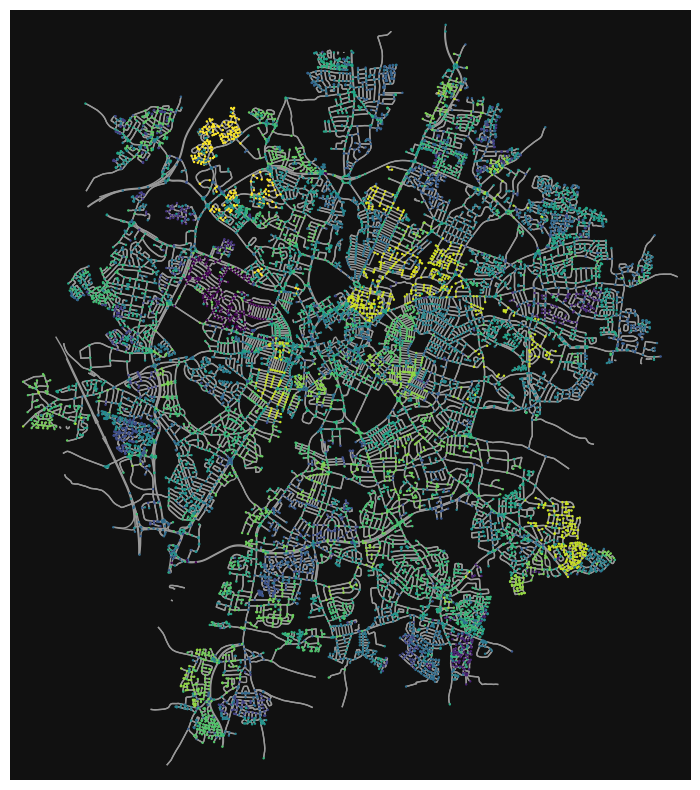

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [235]:
ox.plot_graph(leicester_osmnx_graph_prj, node_color=[
    leicester_osmnx_graph_prj.nodes[node]["UMAP0"] for node in leicester_osmnx_graph_prj.nodes],
    node_size=3,
    figsize=(10, 10))

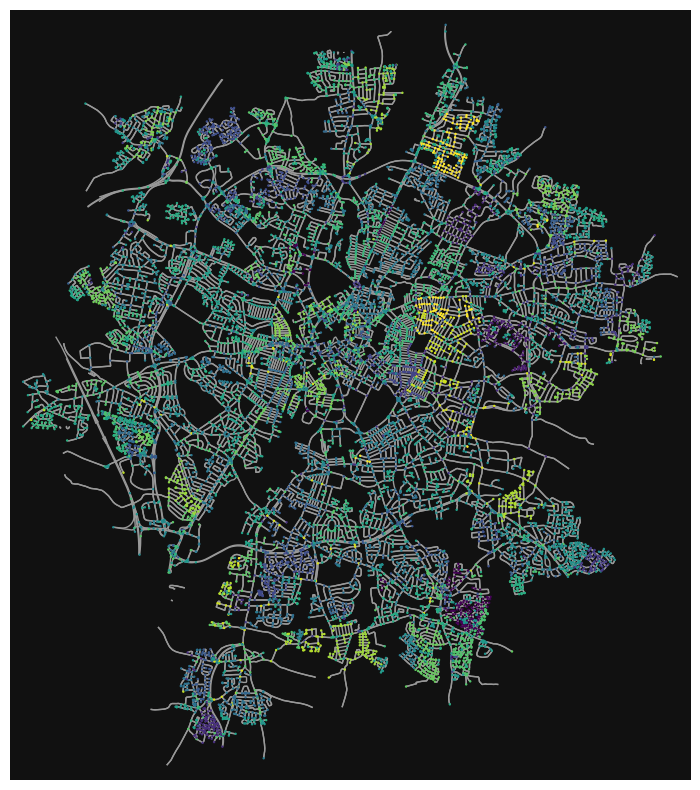

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [236]:
ox.plot_graph(leicester_osmnx_graph_prj, node_color=[
    leicester_osmnx_graph_prj.nodes[node]["UMAP1"] for node in leicester_osmnx_graph_prj.nodes],
    node_size=3,
    figsize=(10, 10))

Double-check the coloring above is correct

In [237]:
leicester_osmnx_graph_prj_df = None
for node in leicester_osmnx_graph_prj:
    node_dict = leicester_osmnx_graph_prj.nodes[node]
    node_dict["osmnx_node_id"] = str(node)
    if leicester_osmnx_graph_prj_df is None:
        leicester_osmnx_graph_prj_df = pd.DataFrame.from_dict([node_dict])
    else:
        leicester_osmnx_graph_prj_df = pd.concat([leicester_osmnx_graph_prj_df, pd.DataFrame.from_dict([node_dict])])
# leicester_osmnx_graph_prj_df.head()

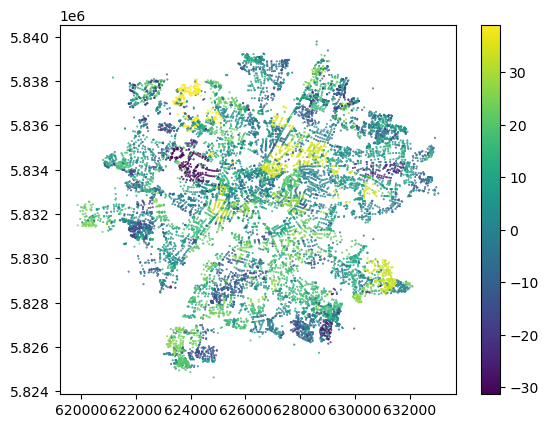

In [238]:
plt.scatter(
    x=leicester_osmnx_graph_prj_df["x"],
    y=leicester_osmnx_graph_prj_df["y"],
    c=leicester_osmnx_graph_prj_df["UMAP0"],
    s=0.2)
plt.colorbar()
plt.show()

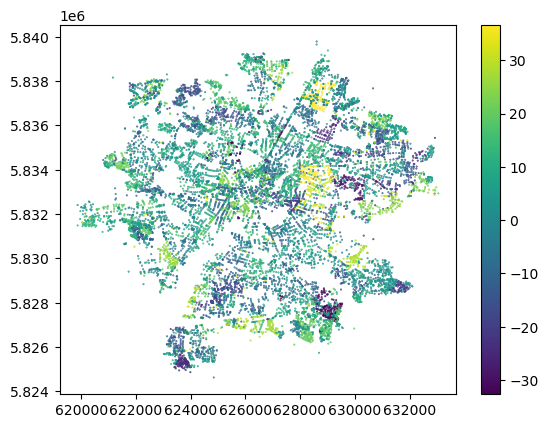

In [239]:
plt.scatter(
    x=leicester_osmnx_graph_prj_df["x"],
    y=leicester_osmnx_graph_prj_df["y"],
    c=leicester_osmnx_graph_prj_df["UMAP1"],
    s=0.2)
plt.colorbar()
plt.show()

## UMAP extreme values

Checking the ego-network of the nodes with the most extreme values in each direction (min and max) for both UMAP0 and UMAP1

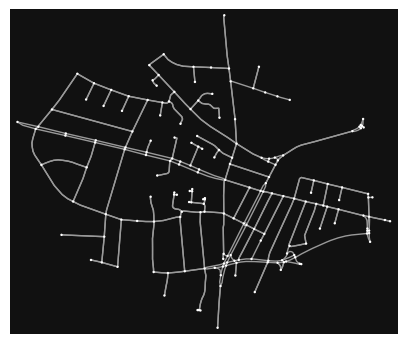

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [240]:
leicester_emb_UMAP0_min = leicester_emb_df[
    leicester_emb_df["UMAP0"] == leicester_emb_df["UMAP0"].min()
    ]["osmnx_node_id"].values[0]
ego_UMAP0_min = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP0_min,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP0_min_prj = ox.project_graph(ego_UMAP0_min)
ox.plot_graph(ego_UMAP0_min_prj, node_size=3, figsize=(5, 5))

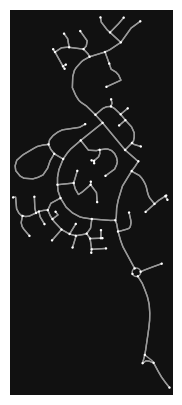

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [241]:
leicester_emb_UMAP0_max = leicester_emb_df[
    leicester_emb_df["UMAP0"] == leicester_emb_df["UMAP0"].max()
    ]["osmnx_node_id"].values[0]
ego_UMAP0_max = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP0_max,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP0_max_prj = ox.project_graph(ego_UMAP0_max)
ox.plot_graph(ego_UMAP0_max_prj, node_size=3, figsize=(5, 5))

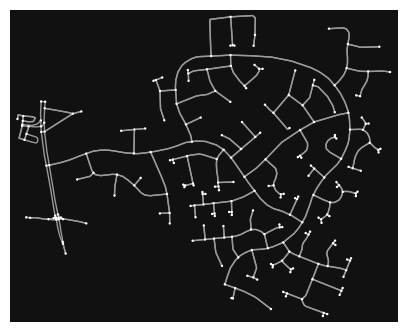

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [242]:
leicester_emb_UMAP1_min = leicester_emb_df[
    leicester_emb_df["UMAP1"] == leicester_emb_df["UMAP1"].min()
    ]["osmnx_node_id"].values[0]
ego_UMAP1_min = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP1_min,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP1_min_prj = ox.project_graph(ego_UMAP1_min)
ox.plot_graph(ego_UMAP1_min_prj, node_size=3, figsize=(5, 5))

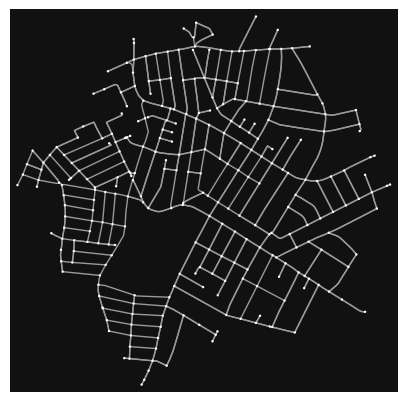

(<Figure size 500x500 with 1 Axes>, <Axes: >)

In [243]:
leicester_emb_UMAP1_max = leicester_emb_df[
    leicester_emb_df["UMAP1"] == leicester_emb_df["UMAP1"].max()
    ]["osmnx_node_id"].values[0]
ego_UMAP1_max = nx.generators.ego_graph(
    leicester_osmnx_graph, leicester_emb_UMAP1_max,
    radius=max_distance, undirected=True, distance="length")
ego_UMAP1_max_prj = ox.project_graph(ego_UMAP1_max)
ox.plot_graph(ego_UMAP1_max_prj, node_size=3, figsize=(5, 5))

## Correlations with basic stats

Checking correlations between UMAP0 and UMAP1 and all the basic statistics from OSMnx. No clear correlation found.

In [244]:
leicester_pairplot_df = pd.merge(
        leicester_emb_df[["osmnx_node_id", "UMAP0", "UMAP1"]],
        leicester_osmnx_basic_stats[["node_id",
            "n", "m", "k_avg", "edge_length_total", "edge_length_avg",
            "streets_per_node_avg", "intersection_count", "street_length_total",
            "street_segment_count", "street_length_avg", "circuity_avg"]],
        left_on="osmnx_node_id",
        right_on="node_id"
    ).drop(columns=["osmnx_node_id", "node_id"])

In [245]:
print(leicester_pairplot_df.corr(method="kendall"))

                         UMAP0     UMAP1         n         m     k_avg   
UMAP0                 1.000000 -0.061094 -0.009908 -0.009915  0.010169  \
UMAP1                -0.061094  1.000000 -0.016532 -0.015497 -0.006335   
n                    -0.009908 -0.016532  1.000000  0.905618 -0.006463   
m                    -0.009915 -0.015497  0.905618  1.000000  0.090636   
k_avg                 0.010169 -0.006335 -0.006463  0.090636  1.000000   
edge_length_total     0.019270 -0.029197  0.629329  0.702992  0.292667   
edge_length_avg       0.031602 -0.027508 -0.257215 -0.190681  0.406190   
streets_per_node_avg  0.038850 -0.004708  0.144103  0.188132  0.290007   
intersection_count   -0.004074 -0.018039  0.851536  0.866580  0.072588   
street_length_total   0.022008 -0.026640  0.656246  0.710693  0.227415   
street_segment_count -0.005733 -0.013345  0.907336  0.910225  0.044546   
street_length_avg     0.029815 -0.027648 -0.253003 -0.184820  0.423295   
circuity_avg          0.004041 -0.0261

## Node similarity

Compare all nodes to a selected one based on the 64 embeddings. The example below uses a node in Clarendon Park.

In [246]:
# # 52.616892, -1.116742
# for node in leicester_osmnx_graph.nodes:
#     if (
#         -1.117 < leicester_osmnx_graph.nodes[node]["x"] < -1.115 and
#         52.615 < leicester_osmnx_graph.nodes[node]["y"] < 52.617
#         ):
#         print(f"{node=}")
#         print(f"{leicester_osmnx_graph.nodes[node]}\n")
# del node

In [247]:
compare_to_node = 10389705

from scipy import spatial
leicester_osmnx_compare = leicester_osmnx_graph_prj.copy()
leicester_embeddings = leicester_emb_df.copy()
leicester_embeddings.set_index("osmnx_node_id", inplace=True, drop=True)
leicester_embeddings = leicester_embeddings.loc[:,"EMB000":"EMB063"]

for node in leicester_osmnx_compare.nodes:
    if node in leicester_emb_df["osmnx_node_id"].values:
        leicester_osmnx_compare.nodes[node]["test_distance"] = spatial.distance.euclidean(
            leicester_embeddings[leicester_embeddings.index == compare_to_node].to_numpy().squeeze(),
            leicester_embeddings[leicester_embeddings.index == node].to_numpy().squeeze()
        )
        if node == compare_to_node:
            leicester_osmnx_compare.nodes[node]["test_case"] = 1
        else:
            leicester_osmnx_compare.nodes[node]["test_case"] = 0
    else:
        leicester_osmnx_compare.nodes[node]["test_case"] = None
        leicester_osmnx_compare.nodes[node]["test_distance"] = None

test_distance_max = max([leicester_osmnx_compare.nodes[node]["test_distance"] if leicester_osmnx_compare.nodes[node]["test_distance"] is not None else 0 for node in leicester_osmnx_compare.nodes])

for node in leicester_osmnx_compare.nodes:
    if leicester_osmnx_compare.nodes[node]["test_distance"] is not None:
        leicester_osmnx_compare.nodes[node]["test_similarity"] = (
            test_distance_max - leicester_osmnx_compare.nodes[node]["test_distance"]
            ) / test_distance_max
    else:
        leicester_osmnx_compare.nodes[node]["test_similarity"] = None

print(leicester_osmnx_compare.nodes[compare_to_node])

{'y': 5831324.55655604, 'x': 627495.4632960256, 'street_count': 4, 'elevation': 89.0, 'elevation_aster': '94', 'elevation_srtm': '89', 'highway': 'traffic_signals', 'lon': -1.1167479, 'lat': 52.6169375, 'UMAP0': 10.919859886169434, 'UMAP1': -5.02791166305542, 'osmnx_node_id': '10389705', 'test_distance': 0.0, 'test_case': 1, 'test_similarity': 1.0}


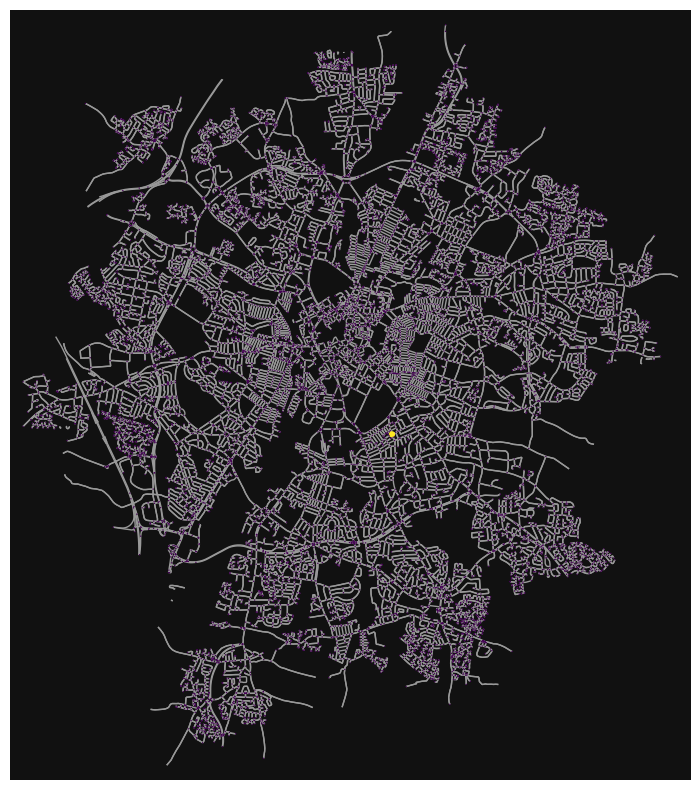

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [248]:
ox.plot_graph(
    leicester_osmnx_compare,
    node_color=[leicester_osmnx_compare.nodes[node]["test_case"] for node in leicester_osmnx_compare.nodes],
    node_size=[20 if leicester_osmnx_compare.nodes[node]["test_case"]==1 else 1 for node in leicester_osmnx_compare.nodes],
    figsize=(10, 10))

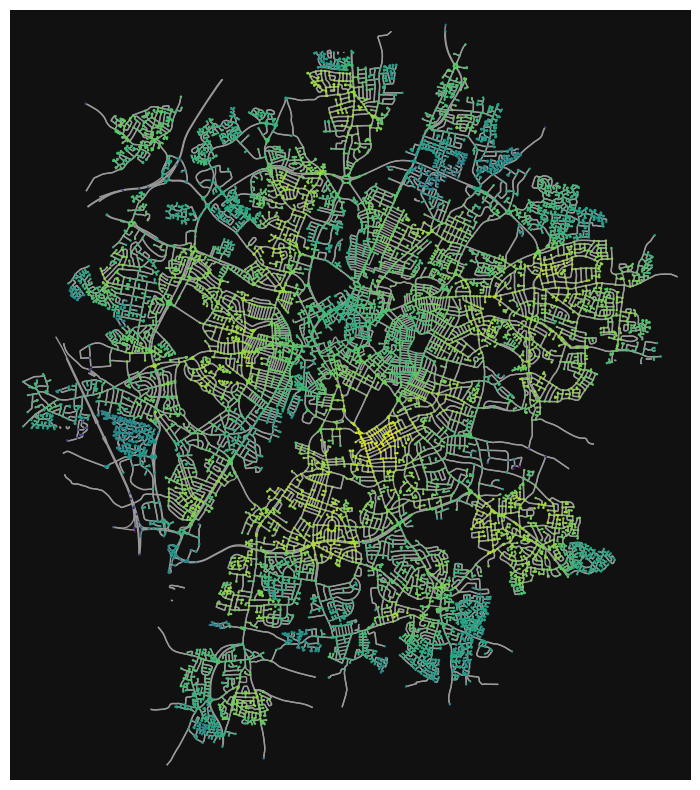

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [249]:
ox.plot_graph(
    leicester_osmnx_compare,
    node_color=[leicester_osmnx_compare.nodes[node]["test_similarity"] for node in leicester_osmnx_compare.nodes],
    node_size=3,
    figsize=(10, 10))